# Cat Classifier

In [1]:
!pip install -Uqq fastai
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 156MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.174453,0.022222,0.009472,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.050899,0.015658,0.006089,00:33


In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

is this a cat? True.
Probability it's a cat: 1.000000


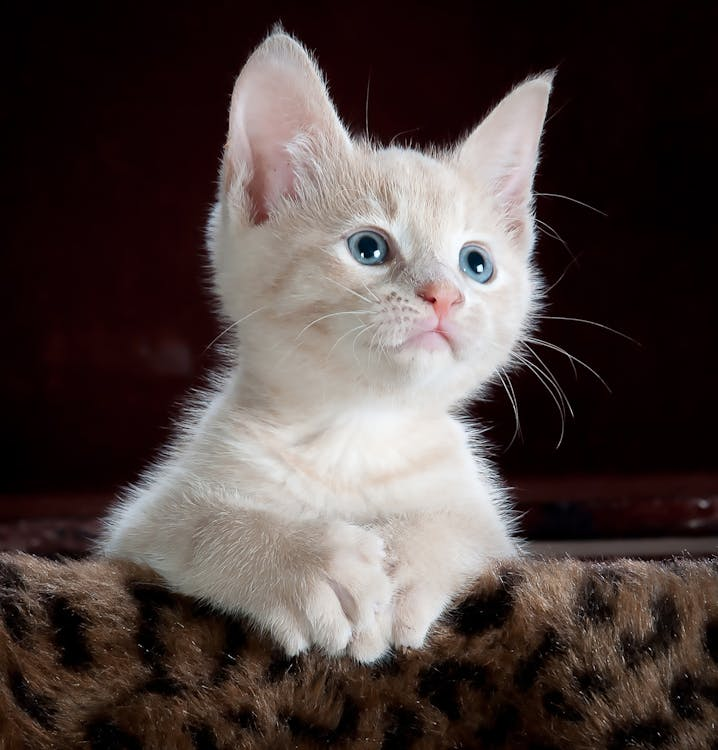

In [6]:
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)
print(f"is this a cat? {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img